In [159]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/raaghav/Desktop/ML-Projects/Customer_Segmentation/customer_segmentation.csv')

## Exploratory Data Analysis (EDA) - Basic

In [160]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [162]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [163]:
df.shape

(2240, 29)

In [164]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [165]:
df.dropna(inplace=True)

In [166]:
df.isna().sum().sum()           # Shows the overall sum, of the sum

0

In [167]:
df.shape                # The shape of the df has changed, no. rows reduced cuz of dropping of na

(2216, 29)

In [168]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### People are most likey to not respond to the call, hence the low mean

In [169]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [170]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

## Data Cleaning  

In [171]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [172]:
df['Age'] = 2025 - df['Year_Birth']

In [173]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [175]:
total_spendings = []
for i in df.columns:
    if 'Mnt' in i:
        total_spendings.append(i)

total_spendings

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [176]:
df['Total_Spendings'] = df[total_spendings].sum(axis=1)

In [177]:
df[['Total_Spendings']]

,Total_Spendings
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [178]:
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days
df['Customer_Since']

0       4793
1       4243
2       4442
3       4269
4       4291
        ... 
2235    4511
2236    4149
2237    4285
2238    4286
2239    4752
Name: Customer_Since, Length: 2216, dtype: int64

## EDA - Data Visualisation

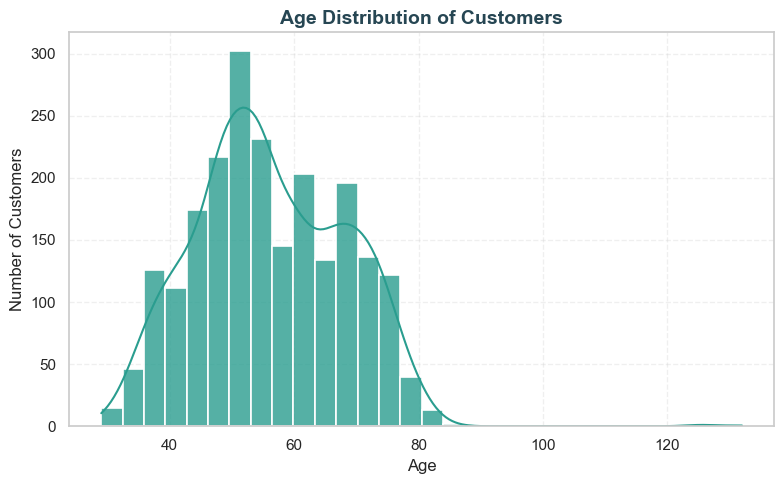

In [217]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(
    df['Age'],
    bins=30,
    kde=True,
    color='#2A9D8F',      # teal tone
    edgecolor='white',
    linewidth=1.2,
    alpha=0.8
)

plt.title('Age Distribution of Customers', fontsize=14, fontweight='bold', color='#264653')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

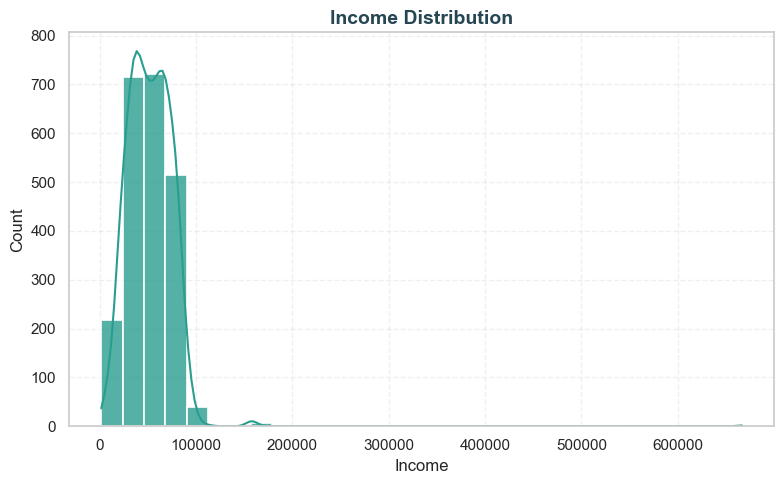

In [218]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(
    df['Income'],
    bins=30,
    kde=True,
    color='#2A9D8F',      # teal tone
    edgecolor='white',
    linewidth=1.2,
    alpha=0.8
)

plt.title('Income Distribution', fontsize=14, fontweight='bold', color='#264653')
plt.xlabel('Income', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

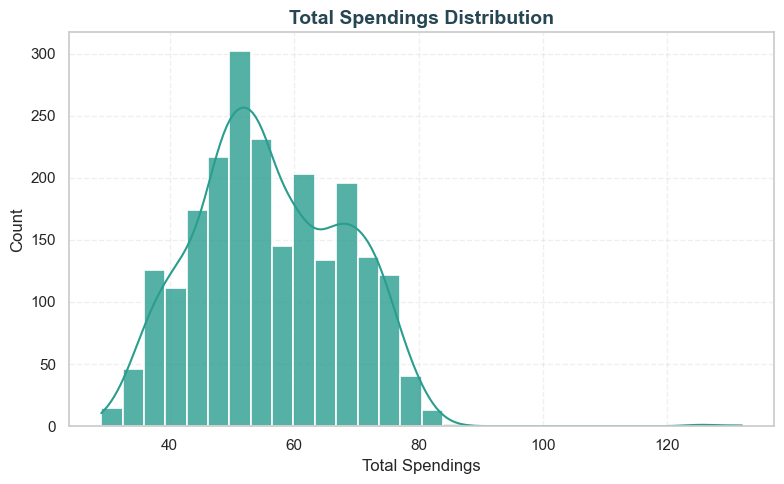

In [220]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(
    df['Age'],
    bins=30,
    kde=True,
    color='#2A9D8F',      # teal tone
    edgecolor='white',
    linewidth=1.2,
    alpha=0.8
)

plt.title('Total Spendings Distribution', fontsize=14, fontweight='bold', color='#264653')
plt.xlabel('Total Spendings', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

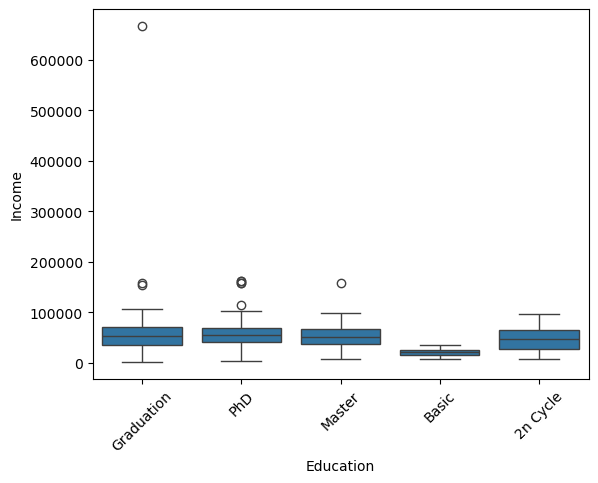

In [182]:
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.show('Income by education level')
plt.show()

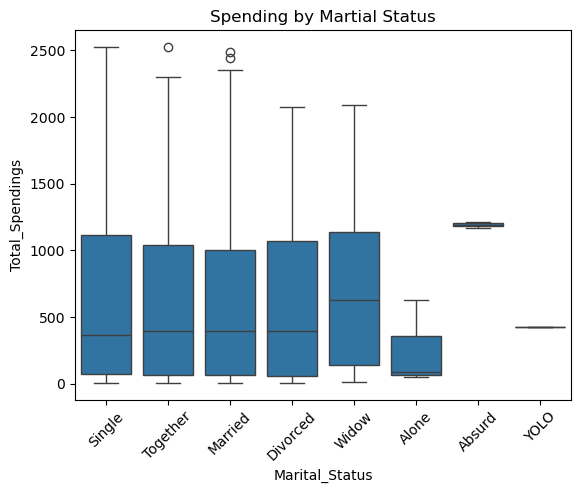

In [183]:
sns.boxplot(x='Marital_Status', y='Total_Spendings', data=df)
plt.xticks(rotation=45)
plt.title('Spending by Martial Status')
plt.show()

In [184]:
# Checking for multicollinearity

corr = df[['Income', 'Age', 'Total_Spendings', 'Recency', 'NumWebPurchases', 'NumStorePurchases']].corr()
corr

,Income,Age,Total_Spendings,Recency,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,0.667576,-0.003970,0.387878,0.529362
Age,0.161791,1.000000,0.113487,0.016295,0.153051,0.127891
Total_Spendings,0.667576,0.113487,1.000000,0.020066,0.528973,0.675181
Recency,-0.003970,0.016295,0.020066,1.000000,-0.005641,-0.000434
NumWebPurchases,0.387878,0.153051,0.528973,-0.005641,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,0.675181,-0.000434,0.516240,1.000000


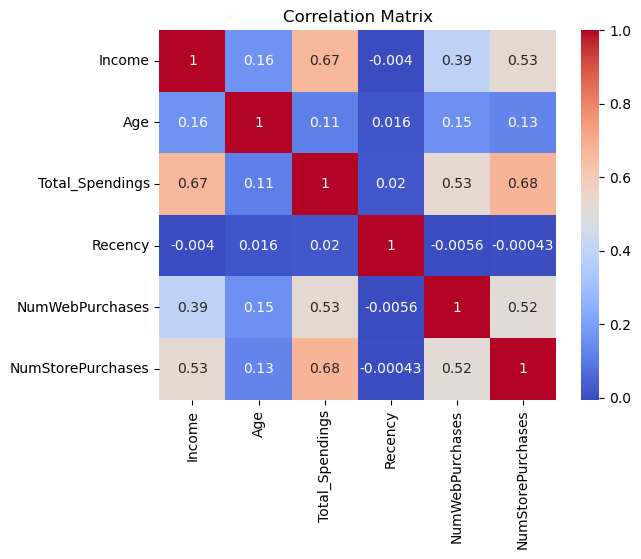

In [185]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [186]:
pivot_income = df.pivot_table(values='Income', index='Education',columns='Marital_Status', aggfunc='mean')

In [187]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

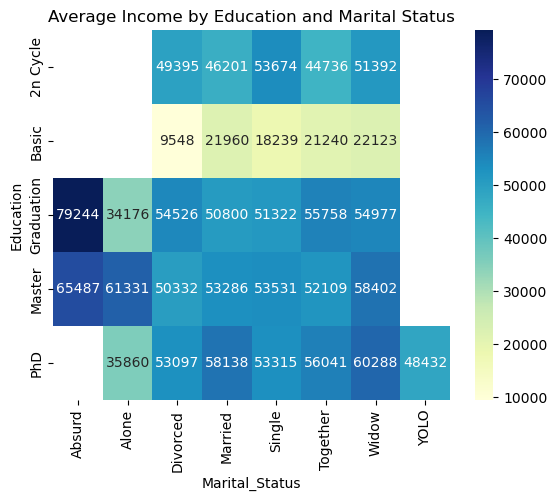

In [188]:
sns.heatmap(pivot_income, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status')

In [189]:
group1=df.groupby('Education')['Total_Spendings'].mean().sort_values(ascending=False)
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spendings, dtype: float64

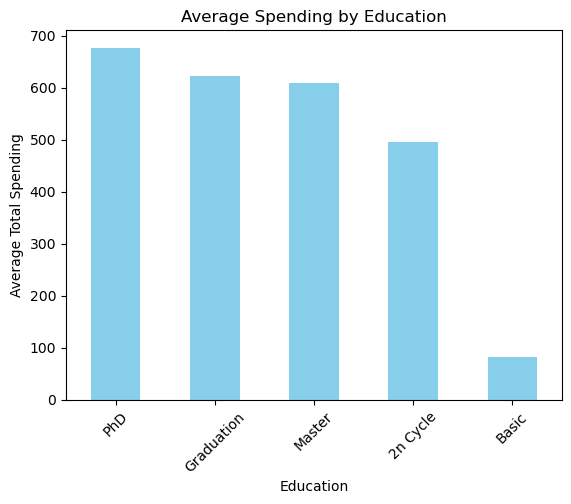

In [190]:
group1.plot(kind='bar',color = 'skyblue')
plt.title("Average Spending by Education")
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.show()

In [191]:
accepted_list = []
for i in df.columns:
    if 'AcceptedCmp' in i:
        accepted_list.append(i)
accepted_list.append('Response')

df['AcceptedAny'] = df[accepted_list].sum(axis=1)

In [192]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [193]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)

In [194]:
df['AcceptedAny'].unique()

array([1, 0])

In [195]:
group2=df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

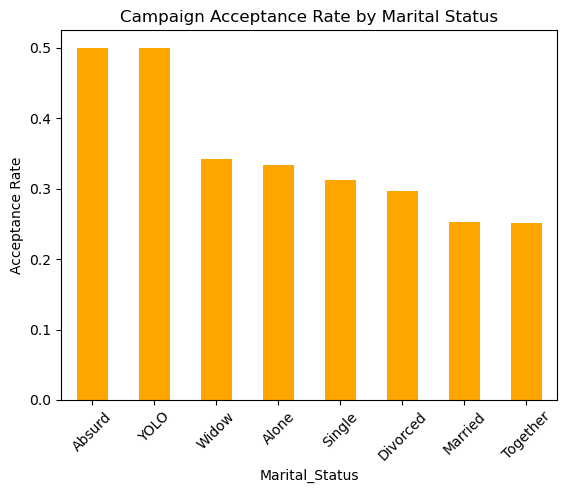

In [196]:
group2.plot(kind='bar',color = 'orange')
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

In [197]:
# Defining bins and labels
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

df[['AgeGroup']]

,AgeGroup
0,60-69
1,70+
2,60-69
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [198]:
group3 = df.groupby("AgeGroup")["Income"].mean()
group3

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_49007/197233607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


AgeGroup
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70+      58767.083102
Name: Income, dtype: float64

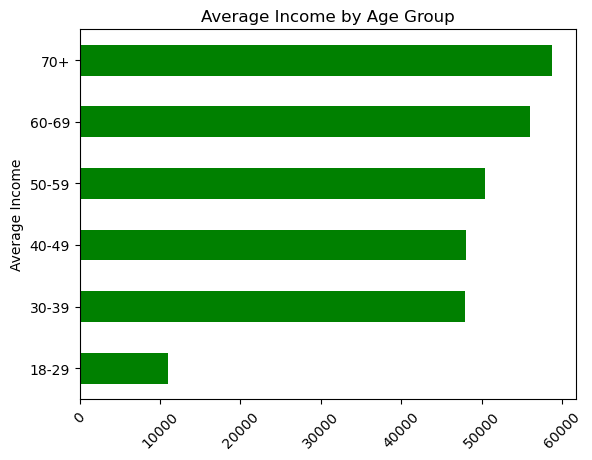

In [199]:
group3.plot(kind='barh',color = 'green')
plt.title("Average Income by Age Group")
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

In [200]:
features = ['Income', 'Age', 'Total_Spendings', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] 
X = df[features].copy()

In [201]:
X.head()

,Income,Age,Total_Spendings,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,68,1617,58,8,4,7
1,46344.0,71,27,38,1,2,5
2,71613.0,60,776,26,8,10,4
3,26646.0,41,53,26,2,4,6
4,58293.0,44,422,94,5,6,5


## Feature Engineering

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [203]:
X_scaled = scaler.fit_transform(X)

In [204]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [205]:
wcss

[10218.620143748782,
 9007.783808892224,
 8499.376723522239,
 7636.370928772801,
 7134.657029131368,
 6842.860280533501,
 6448.369173628231,
 5896.658348100144]

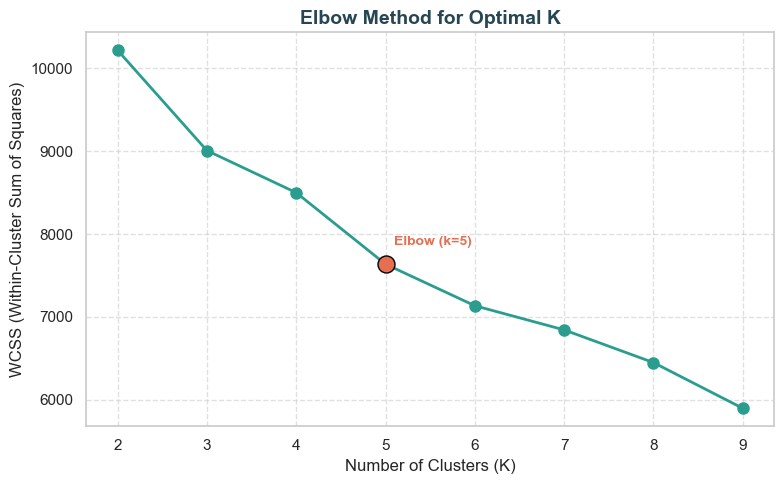

In [215]:
sns.set(style="whitegrid")  #Theme

plt.figure(figsize=(8,5))
plt.plot(range(2,10), wcss, marker='o', markersize=8, linestyle='-', linewidth=2, color='#2A9D8F')

elbow_k = 5  # change this if your elbow is at a different point
plt.scatter(elbow_k, wcss[elbow_k-2], s=150, color='#E76F51', edgecolor='black', zorder=5)
plt.text(elbow_k+0.1, wcss[elbow_k-2]*1.03, f"Elbow (k={elbow_k})", fontsize=10, color='#E76F51', fontweight='bold')

plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold', color='#264653')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(2,10))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [207]:
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spendings,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4793,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4243,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4442,0,60-69,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4269,0,40-49,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4291,0,40-49,4


In [208]:
## Cluster Summary

cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary

,Income,Age,Total_Spendings,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,
0,44392.658621,69.575862,186.372414,46.779310,2.537931,4.075862,5.182759
1,79489.213080,55.997890,1348.474684,50.738397,4.261603,8.396624,2.164557
2,61353.006270,58.363636,882.852665,21.652038,7.159875,8.150470,5.833856
3,61434.566225,60.403974,925.645695,74.420530,7.235099,8.149007,5.764901
4,33584.221662,50.168766,121.065491,76.997481,2.337531,3.246851,6.911839
5,31728.956221,48.380184,98.654378,25.451613,2.073733,3.094470,6.709677


In [209]:
df['Cluster'].value_counts()            # After Cluster is predicted, according to majority you can run your ads campaigns

Cluster
1    474
5    434
4    397
2    319
3    302
0    290
Name: count, dtype: int64

## Principal Component Analysis (PCA) - Final Segmentation Visualisation 

In [210]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:,0],pca_data[:,1]

In [211]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

In [212]:
# Defining cluster labels manually based on insights from cluster_summary
cluster_labels = {
    0: "Senior Value Seekers",
    1: "Affluent Traditionalists",
    2: "Premium Loyalists",
    3: "Omnichannel Enthusiasts",
    4: "Price-Sensitive Browsers",
    5: "Digital Window Shoppers"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

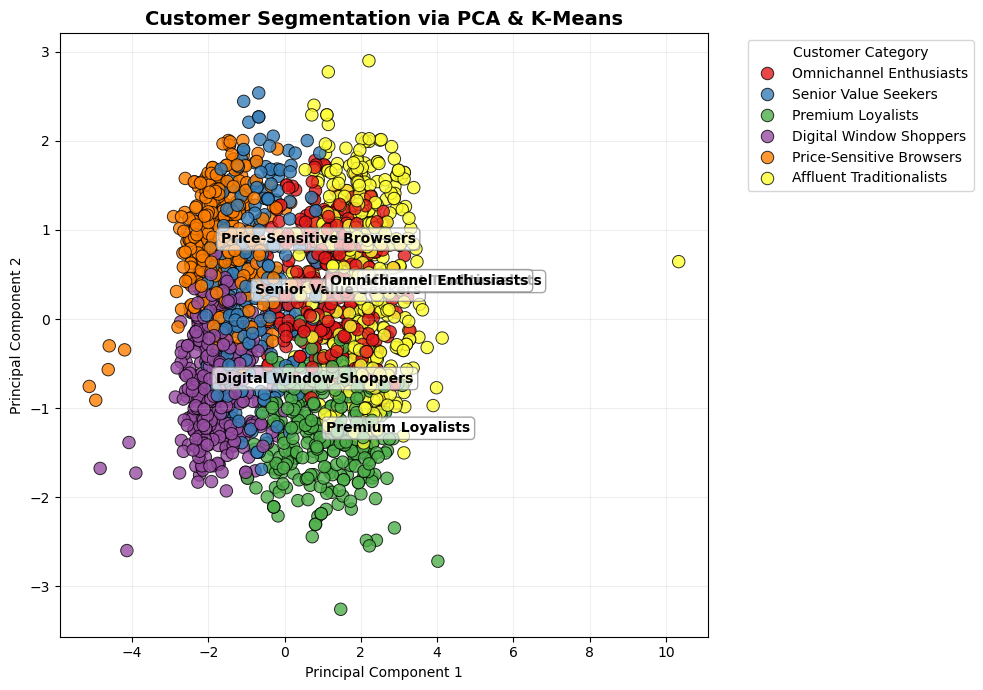

In [214]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster_Label",
    data=df,
    palette="Set1",
    s=80,
    edgecolor="black",
    alpha=0.8
)

# Adding cluster centers 
cluster_centers = df.groupby("Cluster")[["PCA1", "PCA2"]].mean()
for i, row in cluster_centers.iterrows():
    plt.text(
        row["PCA1"], row["PCA2"],
        cluster_labels[i],
        fontsize=10, weight='bold', color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='grey', boxstyle='round,pad=0.3')
    )

plt.title("Customer Segmentation via PCA & K-Means", fontsize=14, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Customer Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


## Dumping the scaler and model object via Joblib

In [221]:
import joblib

joblib.dump(kmeans, 'kmeans.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']